In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("C:/Users/HP/Desktop/weather-check.csv")

In [46]:
df

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [79]:
df['US Region'] = df['US Region'].replace(['-'],'Prefer not to answer')

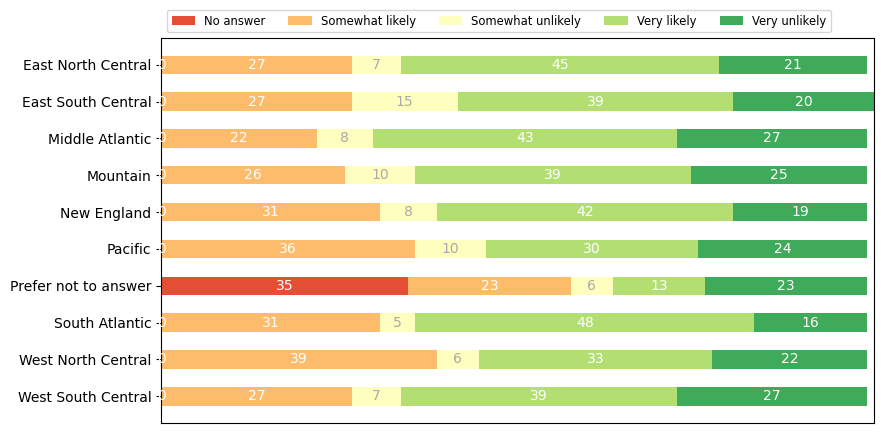

In [82]:
data = df.groupby('US Region')[['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?']].value_counts(normalize=True).unstack().fillna(0) * 100

category_names = ['No answer', 'Somewhat likely','Somewhat unlikely','Very likely',
                  'Very unlikely']
results = {
    data.index[0]: data.values[0].round(),
    data.index[1]: data.values[1].round(),
    data.index[2]: data.values[2].round(),
    data.index[3]: data.values[3].round(),
    data.index[4]: data.values[4].round(),
    data.index[5]: data.values[5].round(),
    data.index[6]: data.values[6].round(),
    data.index[7]: data.values[7].round(),
    data.index[8]: data.values[8].round(),
    data.index[9]: data.values[9].round()
}



def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

